In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
def generate_group_samples(group_conf, random_seed=5613):
    rand = np.random.RandomState(random_seed)

    theta =  rand.uniform(group_conf['theta'][0], group_conf['theta'][1], 30)
    phi = rand.uniform(group_conf['phi'][0], group_conf['phi'][1], 30)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return (x, y, z)

In [3]:
def matrix_from_features(x, y, z, group_id):
    group = np.full(len(x), fill_value=group_id)
    return np.column_stack((x, y, z, group))

In [4]:
def generate_samples(group1_conf, group2_conf, group3_conf):
    x1, y1, z1 = generate_group_samples(group1_conf)
    x2, y2, z2 = generate_group_samples(group2_conf)
    x3, y3, z3 = generate_group_samples(group3_conf)
    
    mat_g1 = matrix_from_features(x1, y1, z1, 1)
    mat_g2 = matrix_from_features(x2, y2, z2, 2)
    mat_g3 = matrix_from_features(x3, y3, z3, 3)
    
    return mat_g1, mat_g2 ,mat_g3

In [5]:
group1 = {
    'theta': [-math.pi/8, math.pi/8],
    'phi': [0, 2 * math.pi],
}

group2 = {
    'theta': [(math.pi/2) - (math.pi/4), (math.pi/2) + (math.pi/4)],
    'phi': [-math.pi/4, math.pi/4],
}

group3 = {
    'theta': [(math.pi/2) - (math.pi/4), (math.pi/2) + (math.pi/4)],
    'phi': [(math.pi/2) - (math.pi/4), (math.pi/2) + (math.pi/4)],
}
g1, g2 , g3 = generate_samples(group1, group2, group3)
sample_data_df = pd.DataFrame(np.concatenate((g1, g2 , g3), axis=0, casting="no"), columns=['x','y','z', 'group'])
sample_data_df

,x,y,z,group
0,0.003951,0.005490,0.999977,1.0
1,-0.375020,0.073668,0.924085,1.0
2,-0.054186,-0.045075,0.997513,1.0
3,0.231245,0.242926,0.942079,1.0
4,-0.016165,-0.145037,0.989294,1.0
...,...,...,...,...
85,-0.135300,0.835931,-0.531896,3.0
86,0.457154,0.605102,0.651814,3.0
87,0.163769,0.922077,0.350647,3.0
88,0.165362,0.759361,-0.629306,3.0


In [6]:
sample_data_df.to_csv('data/no_w_sample.csv', index=False)

<Figure size 432x288 with 0 Axes>

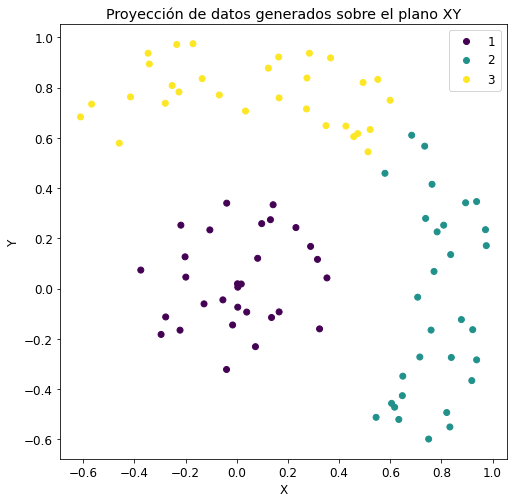

<Figure size 432x288 with 0 Axes>

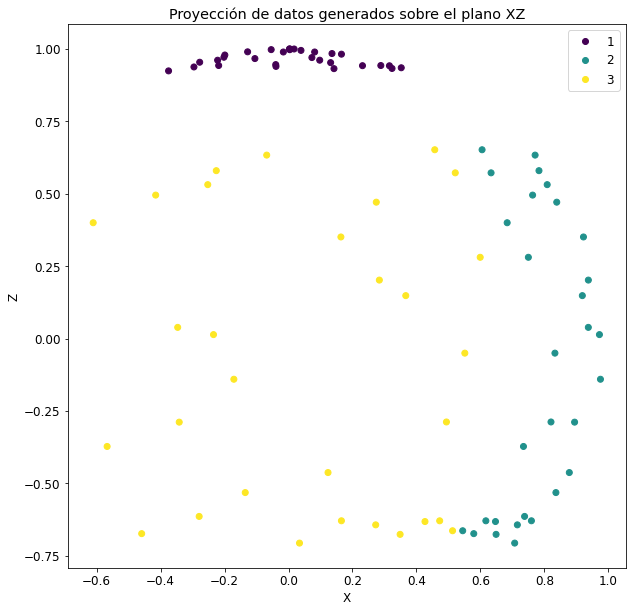

<Figure size 432x288 with 0 Axes>

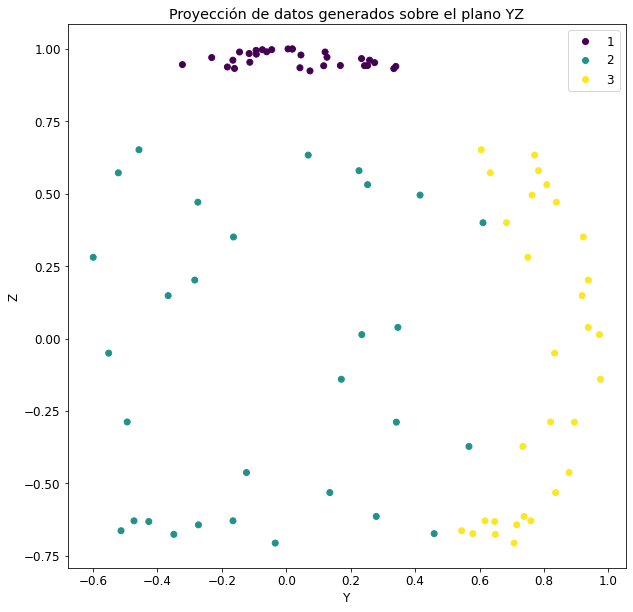

In [23]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def plot_graph(data):
       
    # x, y
    plt.figure(1)
    plt.figure(figsize=(8,8))
    scat = plt.scatter(data.x, data.y, c=data.group)
    plt.title("Proyección de datos generados sobre el plano XY")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(*scat.legend_elements())
    
    plt.savefig('data/xy_graph.png')    
    plt.show()
    
    # x, z
    plt.figure(2)
    plt.figure(figsize=(10,10))
    plt.scatter(data.x, data.z, c=data.group)
    plt.title("Proyección de datos generados sobre el plano XZ")
    plt.xlabel("X")
    plt.ylabel("Z")
    plt.legend(*scat.legend_elements())
    
    plt.savefig('data/xz_graph.png')
    plt.show()
    
    # y, z
    plt.figure(2)
    plt.figure(figsize=(10,10))
    plt.scatter(data.y, data.z, c=data.group)
    plt.title("Proyección de datos generados sobre el plano YZ")
    plt.xlabel("Y")
    plt.ylabel("Z")
    plt.legend(*scat.legend_elements())
    
    plt.savefig('data/yz_graph.png')
    plt.show()
    
plot_graph(sample_data_df)

# With W

In [8]:
def generate_group_samples(group_conf, random_seed=5613):
    rand = np.random.RandomState(random_seed)

    theta =  rand.uniform(group_conf['theta'][0], group_conf['theta'][1], 30)
    phi = rand.uniform(group_conf['phi'][0], group_conf['phi'][1], 30)
    w1 = np.random.normal(0, 0.6, 30)
    w2 = np.random.normal(0, 0.6, 30)
    w3 = np.random.normal(0, 0.6, 30)

    x = (np.sin(theta) * np.cos(phi)) + w1
    y = np.sin(theta) * np.sin(phi) + w2
    z = np.cos(theta) + w3
    
    return (x, y, z)

In [9]:
wg1, wg2 , wg3 = generate_samples(group1, group2, group3)
w_sample_data_df = pd.DataFrame(np.concatenate((wg1, wg2 , wg3), axis=0, casting="no"), columns=['x','y','z', 'group'])
w_sample_data_df

,x,y,z,group
0,-0.888777,0.755055,0.527171,1.0
1,-0.104707,0.154126,1.742150,1.0
2,-0.603683,-0.466090,1.692124,1.0
3,1.089315,0.465367,1.529249,1.0
4,0.252181,0.359001,1.573835,1.0
...,...,...,...,...
85,0.298686,1.588879,-0.444725,3.0
86,0.620447,-0.104696,0.488131,3.0
87,-0.987326,-0.067915,0.285762,3.0
88,0.544549,0.418055,-0.706561,3.0


In [10]:
w_sample_data_df.to_csv('data/w_sample.csv', index=False)

<Figure size 432x288 with 0 Axes>

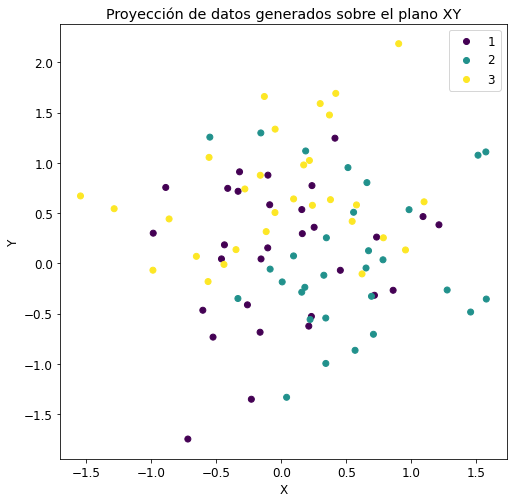

<Figure size 432x288 with 0 Axes>

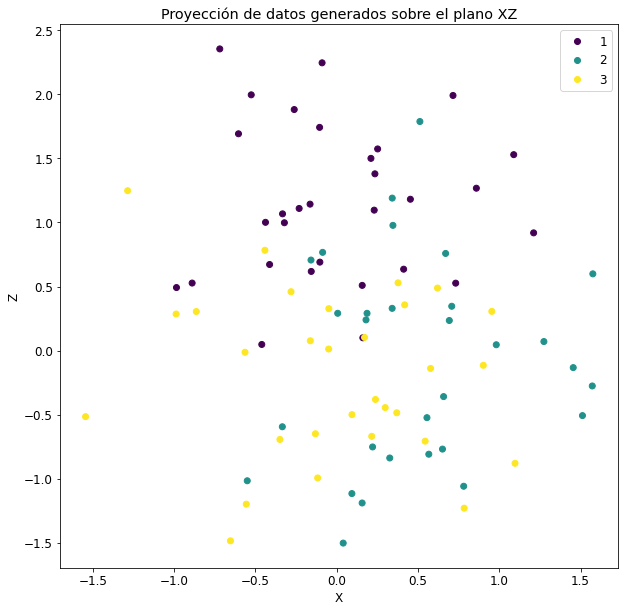

<Figure size 432x288 with 0 Axes>

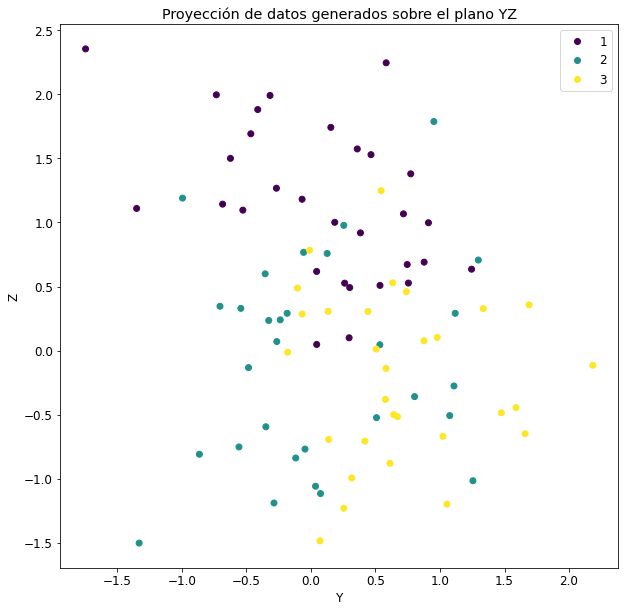

In [24]:
plot_graph(w_sample_data_df)